# Bussiness Objective 
## A hotel manager would like to know whether a family’s annual expenditure on hotels is related to their annual income. In addition, if there is a relationship, he would like you to build a statistical model which quantifies the relationship between the two variables. A data set consisting of a random sample of 20 families, collected last year is available here. 

## Since we are using yearly data, so  we are free from the sesonal trends . For example, hotel gets a lot of customers because of some particular event in the month of aprail and if we are given data for the month of aprail. Now we are asked to predict the sales in the month of  may based on the data of aprail month, that would be the wrong selection of sample data . So we are good with our sample of data. 

## Dataset : Our dataset consist of two columns Expenditure and Income of 20 different families. We have to see whether there is some relationship between those two variables or not. There are no missing values in the dataset. We will see whether there is any outlier present here or not. 

## Hypothesis Generation  : Families with high income tend to spend more money on the hotel facilities. Although there could be several other factors which could affect our target variable(Expenditure) for ex : number_of_kids, number_of_earners, job_type, self_employed etc. But in the given dataset, we are having just the Income as the predictor for the expenditure. So we will simply built a linear regression model, since our dataset is having just 20 rows . We will not be using cross validation , but we will be dependent on some statistical tests for checking the robustness of our model.

## Evaluation Metric: Since we are building a linear regression model .We will use RMSE(Root mena squared error) as the evalation or error metric.

## We will be answering different questions via data visualisations and statistical analysis.

In [1]:
## Load the important libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


['Hotel.csv']


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('../input/Hotel.csv')

In [3]:
train.head()

,Expenditure,Income
0,2400,41200
1,2650,50100
2,2350,52000
3,4950,66000
4,3100,44500


# Ques :  When fitting a regression model is sensible ?  
 ## Ans: Linear regression is a predictive modelling technique that aims to predict the value of an outcome variable based on one or more input predictor variables. The aim is to establish a linear relationship (a mathematical formula) between the predictor variable(s) and the response variable, so we can use it to estimate the value of the response, when predictors values are known.
 
 ## We will see each and every assumption for the linear regression as we go through this notebook.

## One of the first basic assumptions of the about the sample is that, there must be atleast 10-20 cases per independent variable. let's take a look at that.

In [4]:
train.shape

(20, 2)

In [5]:
## Let's explore soem statistical properties of data 
## Check the normality of the target variable
## Here our target variable is the expenditure
train["Expenditure"].describe()

count      20.00000
mean     2855.75000
std      1087.03517
min      1150.00000
25%      2267.50000
50%      2600.00000
75%      3435.00000
max      5160.00000
Name: Expenditure, dtype: float64

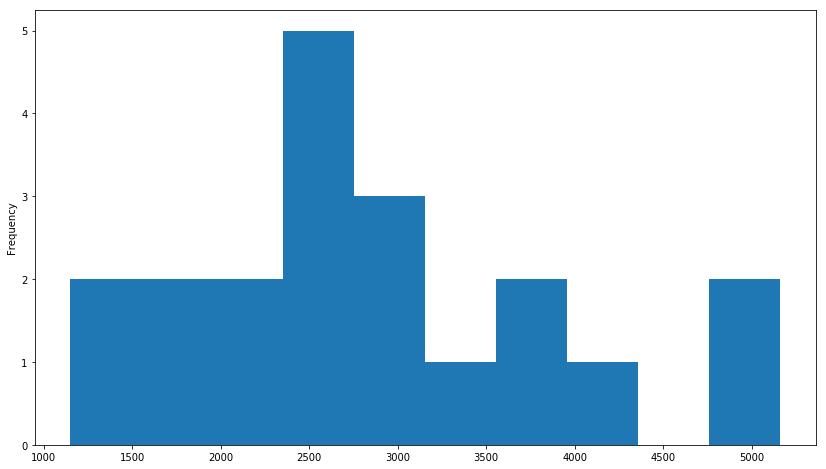

In [6]:
plt.figure(figsize = (14,8))
train["Expenditure"].plot.hist()

## But to describe the statistical properties, we will use distplot.

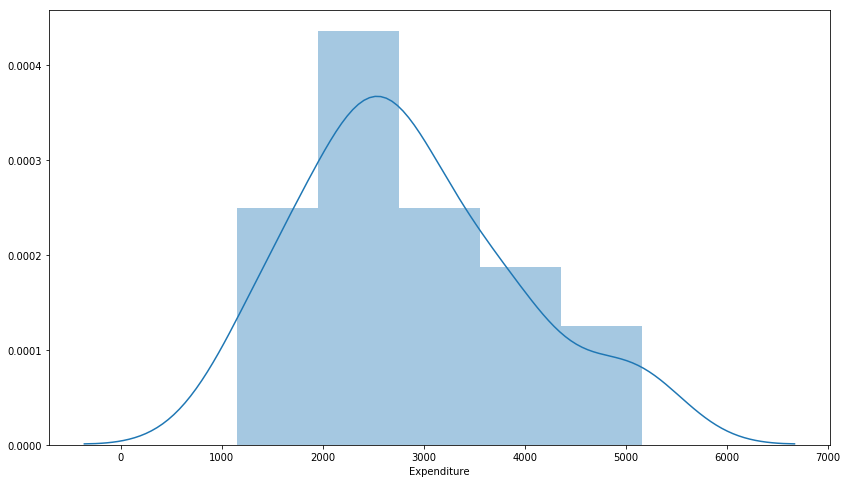

In [7]:
plt.figure(figsize=(14,8))
sns.distplot(train["Expenditure"])

In [8]:
## let's check out the skewness and kurtosis
print("Skewness : " , train['Expenditure'].skew())
print("kurtosis : " , train['Expenditure'].kurt())

Skewness :  0.606637049211
kurtosis :  -0.0348219301746


## One of our basic assumption while performing regression is the normality. Normality means your data should look like a normal distibution.
## Usually, normality is not a problem with the big datasets but since we are having just 20 rows . Let's visualise what we are dealing with.

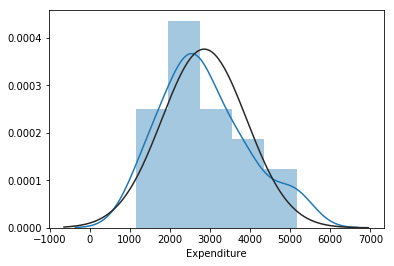

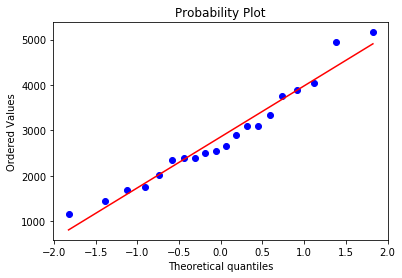

In [9]:
sns.distplot(train['Expenditure'], fit = norm)
fig = plt.figure()
w = stats.probplot(train['Expenditure'], plot = plt)


## Looks like we do not need to do any data transformation, we are good to go with the data in hand.

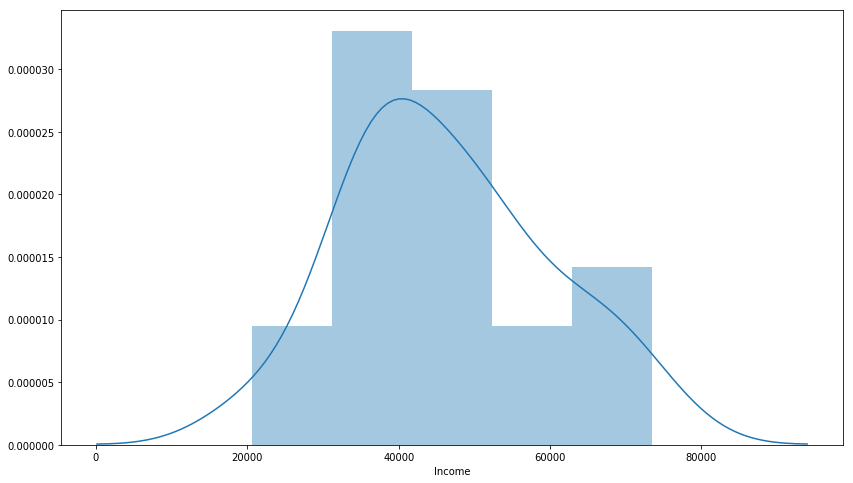

In [10]:
plt.figure(figsize=(14,8))
sns.distplot(train["Income"])

In [11]:
## let's check out the skewness and kurtosis
print("Skewness : " , train['Income'].skew())
print("kurtosis : " , train['Income'].kurt())

Skewness :  0.32700307552
kurtosis :  -0.315290962909


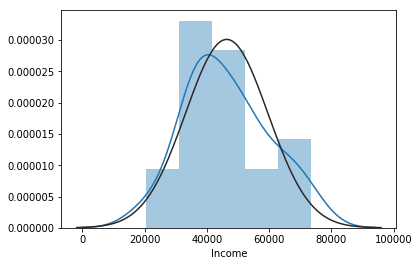

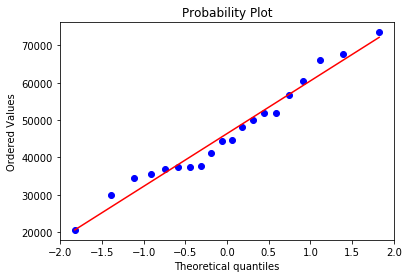

In [12]:
sns.distplot(train['Income'], fit = norm)
fig = plt.figure()
r = stats.probplot(train['Income'], plot = plt)

## So the distribution of income is also similar to the normal distribution and we do not need to make any transformation here.

## Lets make a quick check for the outliers using boxplots,since the linear regression is sensitive to the outliers.

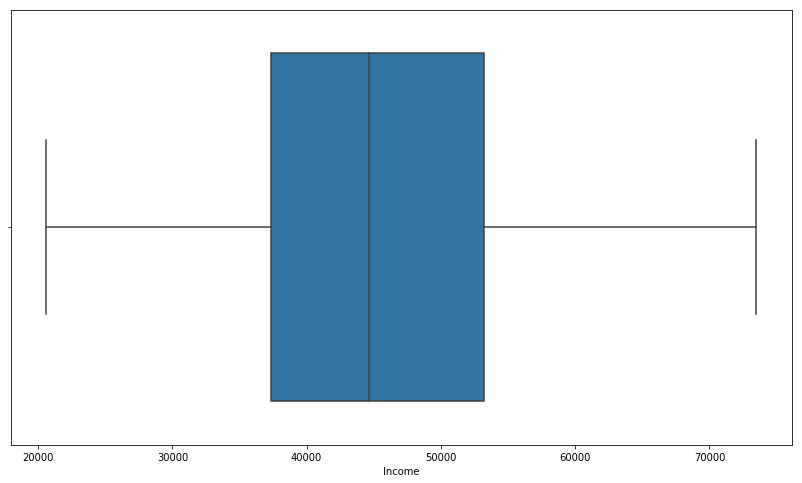

In [13]:
plt.figure(figsize=(14,8))
sns.boxplot(train['Income'])

## Nice and clean graph, there are no outliers in the income column. Let's check the same for the expenditure

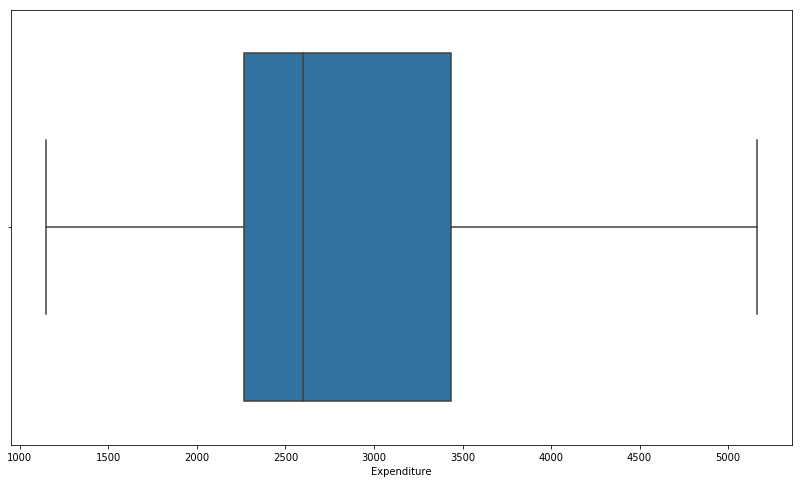

In [14]:
plt.figure(figsize=(14,8))
sns.boxplot(train['Expenditure'])

## Ok so we have a clean chit from the ouliers. Usually if there are one or two outliers we simply drop them, but if more than that then we will have to do further analysis for thier treatement.

## Last assumption is the Homoscedasticity. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable. The best method to check for homoscedasticity is to view it graphicallly.

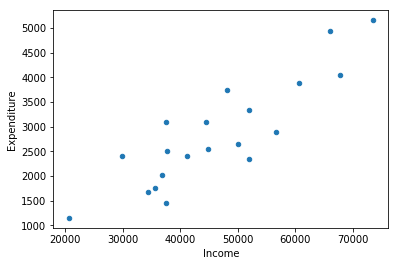

In [15]:
## Let's see the relationship of the expenituer with the family income.
## we will build a scatter plot to explain the relationship betwen the variables.
train.plot.scatter(x = 'Income', y = 'Expenditure')

## Ok, so we are having equal level of variance across the range of predictor variable. I know that's not intuitive. So, let me give you a counter exapmle of what a non-Homosediastic graph would look like.  You will get  a scatter plot in which you can imagine a cone shape instead of a straight line. The spread in the graph will keep on increasing as we move forward from zero. In this plot you can imagine a tilt straight line, but for non-homoscediastic you will imagine a tilt cone like structure whose tail will be at the zero and it will keep on spreading as it moves forward.

## There seems to be the linear relationship between the Income and expenditure, but before reaching any conclusion . Let's have a look at the Corealtion Matrix.

In [16]:
## Hmm, looks like they are corelated. But its too early to say something about thier realtionship. Lets check the corelation matrix.
corelation_mat = train.corr()
corelation_mat

,Expenditure,Income
Expenditure,1.000000,0.875663
Income,0.875663,1.000000


## ## Value of pearson corealtion coefficent between Expenditure and Income is 0.875, which means they are strongly positively corelated
##  Let's see a more clean version of the corelation_mat by the heatmap of the seaborn library.


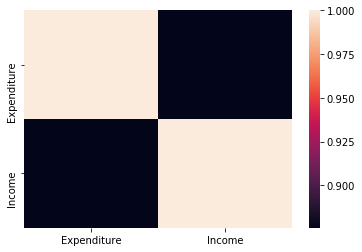

In [17]:
sns.heatmap(corelation_mat)

## let's fit the line of best fit using regplot of seabron library.

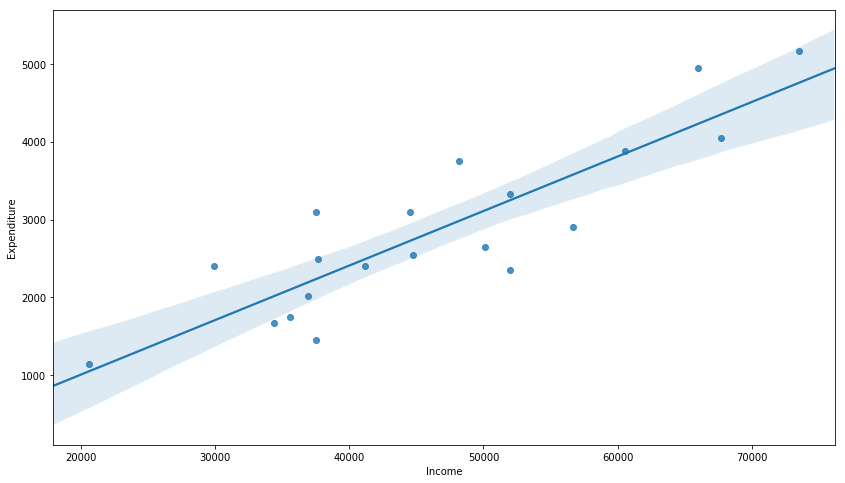

In [18]:
plt.figure(figsize = (14,8))
sns.regplot(x = 'Income', y = 'Expenditure', data = train, fit_reg = True)

# Ques : How to fit a regression model ?
## Ans : We will be building  the regression model by using scikit learn in this notebook, although we can build it from the scratch without using any library but it will be time consuming. First we will build linear regression via stats.api, so that we can get the statistical significant of our model via summary function

In [34]:
## Build the model 
model = sm.OLS(train['Expenditure'], train['Income'])
result = model.fit()


In [35]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Expenditure   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     626.1
Date:                Tue, 22 May 2018   Prob (F-statistic):           5.24e-16
Time:                        16:42:03   Log-Likelihood:                -153.56
No. Observations:                  20   AIC:                             309.1
Df Residuals:                      19   BIC:                             310.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income         0.0622      0.002     25.022      0.0

# How do we interpret the output produced by the software ?
## Ans : In the is notebook we have the complete summary of the given model, which help us to understand the statistical significane of the model . we will list the most important features here 
* R-Squared : Indicates the goodness of fit , generally higher the better (but could be overfitting)
* Adj-R-Squared : Same a s R-Squared, higher the better
* p-value : We can consider a linear model to be statistically significant only when both p-Values are less that the pre-determined statistical significance level, which is ideally 0.05. So does that mean our model is not significant. Well,A statistical result being not significant is not a guarantee that the effect your looking for does not exist, just that your not 95% sure it does.There could be two case in this:
1. Either the effect really doesnot exist.
2. Random error from variables you did can not  control clouded the results and that the size of the sample you had was not large enough to give the precision needed to see the effect, which is the same case as ours. So the reason for p-value to be greator than 0.05 could be the very small size of data.




## Now we will split the dataset and train the model. We will train first model using stats.api and second using scikitlearn just for the experimentation purpose. Since the stats models provide a lot of inforamtion about the model besides coefficients, it will be helpful in our analysis.

In [21]:
target = train['Expenditure']
predictor = train['Income']

## Train Test split

In [22]:
pred_m , pred_cv , target_m , target_cv = train_test_split(predictor , target , test_size = 0.2 , random_state= 89)

## Build the stats model

In [23]:
## Build the model 
model1 = sm.OLS(target_m, pred_m)
result1 = model1.fit()

# Predict the values

In [24]:
p = result1.predict(pred_cv)
print(p)
print(target_cv)

3     3871.443032
6     4311.379740
12    2827.326578
9     2088.232908
dtype: float64
3     4950
6     5160
12    3750
9     1750
Name: Expenditure, dtype: int64


Text(0,0.5,'Predictions')

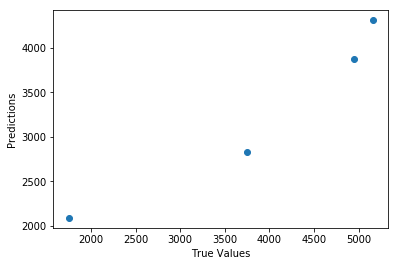

In [25]:
## Let's see how much we are actually deviating from the original values 
plt.scatter(target_cv, p)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Linear regression via scikit learn 

In [26]:
## transforming data to feed into the model 
r = np.array(pred_m)
e = r.reshape(-1,1)
regr = linear_model.LinearRegression()
model_r = regr.fit(e, target_m)
## convert the data to make prediction 
p = np.array(pred_cv)
pred = p.reshape(-1,1)
predictions = model_r.predict(pred)
predictions

array([ 3791.63516327,  4199.8985712 ,  2822.69000844,  2136.80748311])

Text(0,0.5,'Predicted_values')

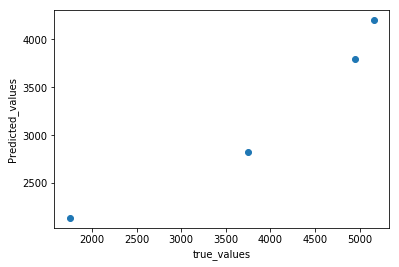

In [27]:
## Build a scatter plot
plt.scatter(target_cv, predictions)
plt.xlabel("true_values")
plt.ylabel("Predicted_values")

In [28]:
print ('Score:', model_r.score(pred, target_cv))

Score: 0.553770384354


# Ques : How to assess whether a regression model is valid ?
## Ans: Although its not a good score, but our model could be overfitting since the dataset is very small.So we will cross validate

In [29]:
# Perform 6-fold cross validation
## but before make the predictor compatible
p = np.array(predictor)
x = p.reshape(-1,1)
scores = cross_val_score(model_r, x, target, cv=6)
print( 'Cross-validated scores:', scores)

Cross-validated scores: [ 0.64519414  0.60125808 -0.40192975  0.6881108   0.51444982  0.96001504]


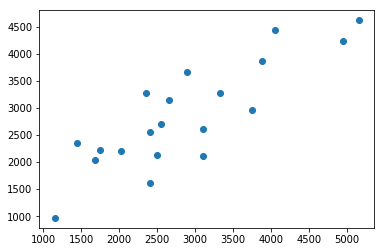

In [30]:
## make cross validation predictions 
predictions = cross_val_predict(model_r, x, target, cv=6)
plt.scatter(target, predictions)

In [31]:
scores_5 = cross_val_score(model_r, x, target, cv=5)
print( 'Cross-validated scores:', scores_5)

Cross-validated scores: [ 0.64519414  0.60125808 -0.57404127  0.37172756  0.96484803]


In [32]:
scores_4 = cross_val_score(model_r, x, target, cv=4)
print( 'Cross-validated scores:', scores_4)

Cross-validated scores: [ 0.62685699  0.75252282  0.44069048  0.95791772]


In [33]:
## so we decided with the cv = 4 since all the acurracy 
print('Mean Accuracy : ', scores_4.mean())

Mean Accuracy :  0.69449699974
